# Project Description
In this notebook I will go over some of the basics of a fully connect feed forward neural network. I will mainly focus on applyling one to a problem, how neural networks are formed, trained, and the math behind them. To demonstrate this I will create my own neural network from scratch using numpy (a python library). In this notebook I will be using the mnist dataset (imported from tensorflow). In this dataset we are given a image a number (0-9) and its label (what number it is). I will go into more detail about the data later in the notebook. What we will do in this noktebook is create a neural network that takes a image of a hand written digit and classifies that image correctly.

Now that we know what this notebook is goint to cover I have to mention some things that will be helpful to know before reading. This notebook goes into the math of neural networks. Some math knowledge of matrix multiplication and multivariable calculus will be useful. We will be doing all the math with numpy so python is important as well.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets

# The Data
As I mentioned the data is the mnist dataset that we imported from tesorflow. We are given an image of a hand written digit (0-9) and its label. These are our X (digit) and y (label). The image of the digit is represented by a 28 by 28 matrix where each value of the matrix is a pixel in the image. The label is just simply a nuber. Below I have imported the data and split it into train and test sets. 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Below is an image of a digit in our dataset. We can clearly see that it is a number five. As I mentioned this is simply just a 28 by 28 matrix where each value in the pixel. So the black parts are a value in the matrix (pixel) that is probably 0. However the actual number 5 probably has higher values like 200. The gray parts are somewhere in between those two values. One of the reasons for why we are using a neural network in to classify these digits is because.TODO: FINISH THIS. This dataset is very high in dimensions. That means that our X (input) has a lot of dimensions. Each input has a size of `28*28=784`. We cannot graph this dataset without using a dimensionality algoritm like PCA or TSNE to reduce the dimensions so we can graph it.

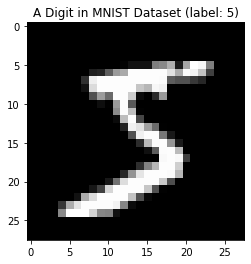

In [3]:
plt.gray()
plt.title('A Digit in MNIST Dataset (label: 5)')
plt.imshow(X_train[0]) 
plt.show()

In [4]:
y_train[0] # label of the digit above

5

Now that we have taken a look at our data we can get into creating a neural network.

# Neural Network Anatomy
A neural network is formed by an input layer, some number of hidden layers, and an ouput layer. All of these layers contain some number of neurons. The input layer has as many neurons as it does inputs. For example in our network our input layer will have 784 neuros one for each pixel in the image. Similarly our output will layer will have ten neurons one for each number 1 through 9. In terms of hidden layers we can have as many as we choose but we also wan't to make sure we have a correct ammount. If we have too many or too little it could affect the performance of the neural network (same goes for neurons in the hidden layers). In the neural network built later in this notebook I choose to have two hidden layesr with 10 neurons. This might be a lot to just think about so below is an image of what the neural network we are building later will look like. 

# TODO add image of the neural network we are building
The lines that are connecting the layers in the image above are called weights. These weights are what we are trying to learn this value of. We want to adjust them carefully and into a direction that gives us the lowest error when training. W can choose to set them randomly or to chnage them manually but that is not an efficient system. But now that we know what makes up a neural network and now that we know that we are trying to learn the values of these weights how do we even use them?

To answer that question I will first go over feeding forward. Below I will explain how it is done. 

# The Math (Feeding Forward)
Below I will go over feeding forward in a nueral network. Feeding forward is when we pass a input through the neural network to get an output. I will use the example of how the neural network we are buidling later will feed forward an input to get an output. 

First to feed foward the input layer to the first hidden layer we will multiply all inputs $\vec{x}$ by all the weights connecting the input layer to h1 $W_1$ and add some bias $b_1$. Doing all that will give us $h_1$. We then apply some non linearity function to that and that will be our activations. In this case we are using relu. This looks like this:

$$ \vec{z_1} = relu(\vec{h_1})$$
$$ \vec{h_1} = W_1 * \vec{x} + \vec{b_1} $$
$$ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$$

Now we just continue this proccess unitl we get to the output layer. So to keep forwarding this input we would now do this: 

$$ \vec{z_2} = relu(\vec{h_2})$$
$$ \vec{h_2} = W_2 * \vec{z_1} + \vec{b_2} $$
$$ \vec{z_2} = relu(W_2 * \vec{z_1} + \vec{b_2})$$

Next we will do:
$$ \vec{h_3} = \vec{h_3}$$
$$ \vec{h_3} = W_3 * \vec{z_2} + \vec{b_3} $$
$$ \hat{y} = \vec{h_3}$$


And lastly our ouput will simply just be:
$$ \hat{y} = softmax(\vec{h_3}) $$ 
Softmax will turn all of the probabilities in the output layer to be values between 0 and 1. Now that we know how the feed forward function works we need to understand how to get the correct output we want when we pass in a input. We do this using back propagation which I will explain in the next section. 

# Back Propogation:
The previous section went over how feed forward works in a neural network to get an output so we can classify (a image of a digit for example) something. 
As I mentioned neural networks contain weights and biases. We can manually adjust them or set them to random variables to see which values give us the best result. This of course is not a good proccess seeing how our network has so many weights and biases. What we want to do instead is learn the values to our weights and biases that will minimise our loss. We can do this with calculus. We can do this by taking the negative gradient of our cost function ($ C = (\hat{y}-y)^2$). The gradient gives the direction of fastest assent. So if we take the negative gradient we will approach a place in which our loss is as close to 0 as possible.  Below I will explain the math that allows us to learn the values for our weights and biases. This will involved mutlivariable calculus.


This is a basic example of what our network looks like. We have an input($X$), two hidden layers ($h_1,h_2$) and three weights ($W_1,W_2,W_3$) and our output layer $h_3$. 
$$ X ---W_1---> h_1 ---W_2---> h_2---W_3---> h_3$$

To calculate the error that our network produces we use the cost function $ C = (\hat{y} - y)^2 $
where $ \hat{y} $ is the output vector/activations and $ y $ is the label as a vector. An example of what these look like is:
$$ \hat{y} = \begin{bmatrix}
0.8 \\
0.1 \\
0.1 
\end{bmatrix} $$ and $$ y = \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix} $$


Now that we know a little bit about or cost function we can move on. As we saw above to feed forward and input we use a series of functions. For example to get the first hidden layers activations we do this $ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$. What we want to do now is see how much each weight and bias is affecting our cost. In other words whats the derivative of the cost function $C$ with respect to $W_1$. Finding this out will tell us how much we should change the values by to minimize our cost. **Warning:** The following section is very math heavy. Some knowledge about multivariable calculus will be helpful.


In the example below we will take the derivative of our cost function with respect to the second weights ($W_3$).
$$ \frac{\partial C}  {\partial W_3} = \frac{\partial C}  {\partial \hat{y}}*\frac{\partial \hat{y}}  {\partial W_3} = ? $$ 

$$ C = (\hat{y}-y)^2  \hspace{10mm} \frac{\partial C}  {\partial \hat{y}} = 2(\hat{y} - y)$$

$$ \hat{y} = \vec{h_3} = W_3*\vec{z_2}+b_3 \hspace{10mm}  \frac{\partial \hat{y}}  {\partial W_3} = \vec{z_2}$$ 

$$ \frac{\partial C}  {\partial W_3} = \frac{\partial C}  {\partial \hat{y}}\frac{\partial \hat{y}}  {\partial W_3} = 2(\hat{y}-y)\vec{z_2}$$

This will tell us by how much we should change the weights in $W_3$ Now we just continue this proccess until we reach the input layer. But first we need to calculate the error produced by the activations in the second hidden layer. So we need to find out. $\frac{\partial C}{\partial h_2}$.

$$\frac{\partial C}{\partial h_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2}$$

$$ C = (\hat{y}-y)^2  \hspace{10mm} \frac{\partial C}  {\partial \hat{y}} = 2(\hat{y} - y)$$

$$ \hat{y} = \vec{h_3} = W_3*\vec{z_2}+b_3 \hspace{10mm}  \frac{\partial \hat{y}}  {\partial z_2} = W_3$$ 

$$ z_2 = relu(h_2) \hspace{10mm} \frac{\partial z_2}  {\partial h_2} = relu`(h_2)$$

$$\frac{\partial C}{\partial h_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} = 2(\hat{y} - y)W_3relu`(h_2)$$


This will tell us the error produced by the activations in the second hidden layer. Now we continue our process of trying to find out how much the weights contributed to the error and how much we should move them by. Next we need to find $\frac{\partial C}{\partial W_2}$.

$$\frac{\partial C}{\partial W_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} \frac{\partial h_2}{\partial W_2} = ? $$ 

We know that $ \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} $ is equal to $ 2(\hat{y} - y)W_3relu`(h_2)$
So we just need to find $\frac{\partial h_2}{\partial W_2}$
$$h_2 = W_2*z_1+b_2 \hspace{10mm}  \frac{\partial h_2}{\partial W_2} = z_1$$


$$\frac{\partial C}{\partial W_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} \frac{\partial h_2}{\partial W_2} = 2(\hat{y} - y)W_3relu`(h_2)z_1 $$


Our last two steps are more of the same but here they are. We need the find the error produced by the first hidden layer: The equation below will tell us. 

$$\frac{\partial C}{\partial h_1} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} \frac{\partial h_2}{\partial z_1} \frac{\partial z_1}{\partial h_1} = ? $$

Since we already know a good part of the equation all we need to find is:
$$\frac{\partial h_2}{\partial z_1} \frac{\partial z_1}{\partial h_1} $$ 

$$ h_2 = W_2*z_1+b_2 \hspace{10mm} \frac{\partial h_2}{\partial z_1} = W_2$$

$$ z_1 = relu(h_2)  \hspace{10mm} \frac{\partial z_1}{\partial h_1} =relu'(h1) $$

$$\frac{\partial C}{\partial h_1} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} \frac{\partial h_2}{\partial z_1} \frac{\partial z_1}{\partial h_1} = 2(\hat{y} - y)W_3relu`(h_2)z_1W_2relu'(h1)$$

Lastly to find the error produced by the first weights we do calculation below:
$$\frac{\partial C}{\partial W_1} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} \frac{\partial h_2}{\partial z_1} \frac{\partial z_1}{\partial h_1}\frac{\partial h_1}{\partial W_1} =?$$

Simarly because we know what more than half of the equation is all we need to do is find 
$$\frac{\partial h_1}{\partial W_1}$$

$$h_1 = W_1*x+b_1  \hspace{10mm}  \frac{\partial h_1}{\partial W_1} = x$$
$$\frac{\partial C}{\partial W_1} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial h_2} \frac{\partial h_2}{\partial z_1} \frac{\partial z_1}{\partial h_1}\frac{\partial h_1}{\partial W_1} = 2(\hat{y} - y)W_3relu`(h_2)z_1W_2relu'(h1)x $$

That is all the math for the weights. We will be using these exact formulas to train our network. While that was a lot it becomes really easy to calculate derivatives once you have the first couple down. One thing I also wanted to mention was our network uses biases as well but I decided to not show the calculations for the biases because it is more repetition and they are very simple. However they are included in the code below

Now that we have talked about how a neural network feeds forward an input to get and output. And that we have went over how we can learn the values of the weights and biases of our neural network, it is time to build one. Below is the code to a neural network class which we will train to classify dataset. The network below has an input layer of  784 neurons for inputs, 2 hiddeen layers with ten neurons and one output layer.

# Creating the Network
Now that we know how we feed forward a input to get a output and how we learn the correct values for the weights in our neural network we can start to implement it. Below is a class representing a nueral network. As explained earlier the network will have a input layer, three hidden layers and three weights and biases. The feed forward function will do the exact same thing that was explained above. Same for the back propagation. I have comments on the code that explain what step we are calculating in feed forward or back propagation.inish explaining back propagation 

In [5]:
class NeuralNetwork:
    def __init__(self, input_shape, h1_shape, h2_shape, output_shape):
        # layers/activations
        self.input = np.random.rand(input_shape, 1)- 0.5
        self.h1 = np.random.rand(h1_shape, 1)- 0.5
        self.h2 = np.random.rand(h2_shape, 1)- 0.5
        self.h3 = np.random.rand(output_shape, 1)- 0.5
        # weights 
        self.w_1 = np.random.rand(h1_shape, input_shape)- 0.5
        self.w_2 = np.random.rand(h2_shape, h1_shape)-0.5
        self.w_3 = np.random.rand(output_shape, h2_shape)- 0.5
        
        # biases 
        self.b_1 = np.random.rand(h1_shape, 1) - 0.5
        self.b_2 = np.random.rand(h2_shape, 1) - 0.5
        self.b_3 = np.random.rand(output_shape, 1) - 0.5 
        
    def relu(self,activations):
        return np.maximum(0, activations)

    def relu_deriv(self, activations):
        return activations > 0

    def softmax(self, activations):
        return np.exp(activations) / np.sum(np.exp(activations))
    
    def feed_forward(self, X):
        # input
        # reshapre the input into vector form.
        # Example [1, 0, 0] -> [[1], [1], [1]]
        self.input = np.reshape(X, (-1,1))
        
        # input -> h1
        # the activations in the first hidden layer are given by the dot product 
        # of the weights by the input plus some biass its all then passed into
        # our activation function. relu(W_1*x+b_1)
        z1 = self.relu(np.dot(self.w_1, self.input) + self.b_1)
        self.h1 = z1
        
        # h1 -> h2
        # the activations in the seocnd hidden layer (h_2) are given by the dot product 
        # of the second weights (w_2) by the previous activations (h1) plus the bias(b_2).
        # W_2*h1+b_2
        z2 =  self.relu(np.dot(self.w_2, z1) + self.b_2)
        self.h2 = z2 
        
        
        z3 = np.dot(self.w_3, z2) + self.b_3
        self.h3 = z3
        # h2 -> output 
        # our output activtions/predictions are given by the second layer activations (h_2)
        # put into the softmax function. 
        output = self.softmax(self.h3)
        
        return output
    
    def back_prop(self, output, y, learning_rate=0.01):
        # error produced by the output
        output_error = (2 * (output - y))

        # derivative of cosf function with respect to third weights
        dw_3 = -learning_rate * output_error.dot(self.h2.T)
        # derivative of cost function with respect to the third biases
        db_3 = -learning_rate * output_error
        
        # error produced by the second hidden layer activations
        h2_error = self.w_3.T.dot(output_error) * self.relu_deriv(self.h2)
        # derivative of cost function with respect to second weights
        dw_2 = -learning_rate * h2_error.dot(self.h1.T)
        # derivative of the cost function with respect to second biases
        db_2 = -learning_rate * h2_error

        # error produced by the first hidden layer activations
        h1_error = self.w_2.T.dot(h2_error) * self.relu_deriv(self.h1)
        dw_1 = -learning_rate * h1_error.dot(self.input.T)
        db_1 = -learning_rate * h1_error
        
        # update all the weights
        self.w_1 += dw_1
        self.w_2 += dw_2
        self.w_3 += dw_3
        
        # update all the biases
        self.b_1 += db_1
        self.b_2 += db_2
        self.b_3 += db_3
        return 0

    def get_y_vector(self, y):
        # return a vector that looks like [0, 0, 0, 1, ... 0] 
        vector = [1 if i == y else 0 for i in range(len(self.h2))]
        vector = np.reshape(vector, (-1, 1))
        return vector
    
    def predict(self, X):
        prediction = self.feed_forward(np.array(X.flatten()))
        return np.argmax(prediction)

    def get_prediction(self, output_layer):
        return np.argmax(output_layer)
       
    def accuracy(self, X_data, y_data):
        correct = 0
        for i in range(len(X_data)):
            X = np.array(X_data[i].flatten())
            y = self.get_y_vector(y_data[i])
            output = self.feed_forward(X)  
            prediction = self.get_prediction(output)
            if np.argmax(y) == prediction:
                correct += 1                
        return correct/X_data.shape[0]
    
    def train(self, X_data, y_data, iterations):
        for i in range(iterations):
            for i in range(len(X_data)):
                X = np.array(X_data[i].flatten())
                y = self.get_y_vector(y_data[i])
                output = self.feed_forward(X)
                self.back_prop(output, y)
        training_accuracy = self.accuracy(X_data, y_data)
        return training_accuracy

In [6]:
# get the shape of the input layer
input_shape = X_train[0].flatten().shape[0]
input_shape 

784

In [7]:
# get the shape of the output layer
output_shape = len(list(set(y_train)))
output_shape

10

In [8]:
# make the values in the image from 0-1
X_train = X_train/255

In [9]:
def get_info(train_X, train_y, iterations):
    accuracy_data = {'iteration': [], 'accuracy': []}
    for i in range(len(iterations)):
        nn = NeuralNetwork(input_shape=input_shape, h1_shape=10, h2_shape=10, output_shape=output_shape)
        training_accuracy = nn.train(train_X, train_y, iterations[i])
        accuracy_data['iteration'].append(iterations[i])
        accuracy_data['accuracy'].append(training_accuracy)

    accuracy_data = pd.DataFrame(data=accuracy_data)
    return accuracy_data

In [10]:
iterations = [i for i in range(1, 100, 10)]

In [11]:
data = get_info(X_train, y_train, iterations)

From the graph below we can see that 50 or even 10 iterations is just fine for trainig. After 50 the accuracy starts to go down which might be a sign of overfitting. Now that we have this information it is time to actually train our model. 

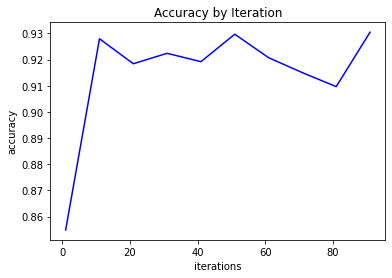

In [12]:
plt.plot(data['iteration'], data['accuracy'], color='b')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title("Accuracy by Iteration")
plt.show()

In [13]:
# initialize the network
neural_network = NeuralNetwork(input_shape=input_shape, h1_shape=10, h2_shape=10, output_shape=output_shape)

In [14]:
# get training accuracy
training_accuracy = neural_network.train(X_train, y_train, 50)

In [15]:
f'Training Accuracy: {training_accuracy}'

'Training Accuracy: 0.9197'

In [16]:
X_test = X_test/255

In [17]:
# get test accuracy
test_accuracy = neural_network.accuracy(X_test, y_test)

In [18]:
f'Test Accuracy: {test_accuracy}'

'Test Accuracy: 0.9096'

In [19]:
y_test[1]

2

In [20]:
neural_network.predict(X_test[1])

2

# Conclusion and Further Topics of Neural Networks
In this notebook I went over some basics of neural networks but there are somethings I wanted to mention as well. One of the things that we can implement in our neural network to give us better peformance is introduce a dropout layer. What a dropout layer is is a layer in which some number of neurons will turn to 0 no matter what. For example as we train our network and we are feeding forward an example we can choose to set 1 neuron in our layer to equal 0. This will make sure that the neural network doesn't just memorize the data and will prevent overfitting. It will make sure that it's actually learning the data and its important relationships. 

Another thing I wanted to go over was a different training method from the one used in this notebook. In this notebook we took the gradient of our cost function using our whole data. What we could do instead is do stocastic gradient descent which means instead of taking the gradient of our cost function for our whole data we take the gradient of our cost function using some mini batches. A mini batch is just our subset of our data. So instead of feeding all of our data for every iteration and performing back propagation we instead feed a mini batch of our data and calculate the gradient for that. Doing this will allow for faster training since we only have to take a smaller gradient for each mini batch.Neural networks are really powerful too